In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

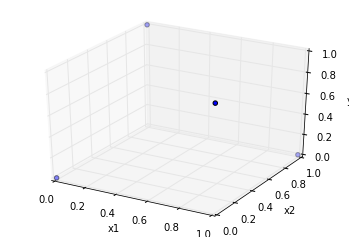

In [373]:
train_dataset = np.array([[0,0],[0,1],[1,0],[1,1]]).astype(np.float32)
train_labels = np.array([[0],[1],[1],[0]]).astype(np.float32)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = train_dataset[:,0]
x2 = train_dataset[:,1]
y = train_labels.flatten()

ax.scatter(x1, x2, y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_zlim([0.0,1.0])

plt.show()

In [675]:
def tf_prediction(X,W1,b1,W2,b2):
    h = tf.nn.relu(tf.matmul(X,W1) + b1)
    return tf.nn.relu(tf.matmul(h,W2) + b2)

graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=[4,2])
    y = tf.placeholder(tf.float32, shape=[4,1])

    # Try with different init
    W1 = tf.Variable(tf.random_uniform([2,2], -0.1, 0.1))
    # W1 = tf.Variable([[0.1,0.0],[0.0,0.1]])
    # W1 = tf.Variable(tf.truncated_normal([2,2], 0, 0.01))
    b1 = tf.Variable(tf.zeros([2]))

    W2 = tf.Variable(tf.random_uniform([2,1], -0.1, 0.1))
    # W2 = tf.Variable([[0.1],[0.0]])
    # W2 = tf.Variable(tf.truncated_normal([2,1], 0, 0.01))
    b2 = tf.Variable(tf.zeros([1]))

    # Calculate predictions
    y_predict = tf_prediction(X,W1,b1,W2,b2)

    # Minimize the mean squared errors
    loss = tf.reduce_mean(tf.square(y_predict - y))
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [677]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.initialize_all_variables())
    feed_dict = {X : train_dataset, y : train_labels}
    init_weights1, init_biases1, init_weights2, init_biases2 = sess.run([W1, b1, W2, b2]) 

    for step in range(1501):
        _, l, predictions, weights1, biases1, weights2, biases2 = sess.run([optimizer, loss, y_predict, W1, b1, W2, b2], feed_dict=feed_dict)

        if step % 100 == 0:
            print('Loss at step %d: %f ' % (step,l))

print("Final predictions:")
print(predictions)

Loss at step 0: 0.499861 
Loss at step 100: 0.239256 
Loss at step 200: 0.090398 
Loss at step 300: 0.000864 
Loss at step 400: 0.000002 
Loss at step 500: 0.000000 
Loss at step 600: 0.000000 
Loss at step 700: 0.000000 
Loss at step 800: 0.000000 
Loss at step 900: 0.000000 
Loss at step 1000: 0.000000 
Loss at step 1100: 0.000000 
Loss at step 1200: 0.000000 
Loss at step 1300: 0.000000 
Loss at step 1400: 0.000000 
Loss at step 1500: 0.000000 
Final predictions:
[[  4.95441100e-07]
 [  9.99999523e-01]
 [  9.99999523e-01]
 [  4.61675597e-07]]


In [678]:
def prediction(X, W1, b1, W2, b2):
    h = np.dot(X,W1) + b1
    r = np.maximum(0, h)
    return np.maximum(0,np.dot(r,W2) + b2)

init_weights1:
[[-0.02342782  0.08084211]
 [ 0.05925109 -0.07343845]]
init_biases1:
[ 0.  0.]
init_weights2:
[[ 0.00467789]
 [-0.04349084]]
init_biases2:
[ 0.]


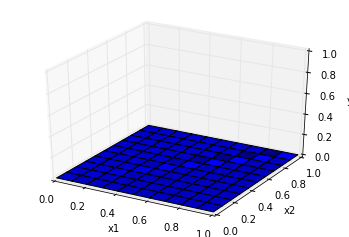

In [679]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = x2 = np.arange(0.0, 1.01, 0.01)
px1, px2 = np.meshgrid(x1, x2)

pX = np.array([[x,y] for x,y in zip(np.ravel(px1), np.ravel(px2))]).astype(np.float32)


py = prediction(pX, init_weights1, init_biases1, init_weights2, init_biases2)

ax.plot_surface(px1, px2, py.reshape(px1.shape))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_zlim([0.0,1.0])

print('init_weights1:')
print(init_weights1)
print('init_biases1:')
print(init_biases1)
print('init_weights2:')
print(init_weights2)
print('init_biases2:')
print(init_biases2)


plt.show()

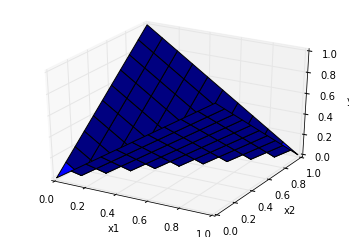

In [680]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = x2 = np.arange(0.0, 1.01, 0.01)
px1, px2 = np.meshgrid(x1, x2)

pX = np.array([[x,y] for x,y in zip(np.ravel(px1), np.ravel(px2))]).astype(np.float32)


py = prediction(pX, weights1, biases1, weights2, biases2)

ax.plot_surface(px1, px2, py.reshape(px1.shape))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.set_zlim([0.0,1.0])

plt.show()

In [681]:
print(weights1)

[[-0.84475416  0.84537882]
 [ 0.8447541  -0.84537888]]


In [682]:
print(bias1)

[  0.  -25.5]


In [683]:
print(weights2)

[[ 1.18377531]
 [ 1.18290055]]


In [684]:
print(bias2)

[ 0.50000012]


In [685]:
print(predictions)

[[  4.95441100e-07]
 [  9.99999523e-01]
 [  9.99999523e-01]
 [  4.61675597e-07]]
